In [1]:
import numpy as np
import h5py
from keras.models import Model, load_model

Using TensorFlow backend.


In [3]:
model = load_model(r"C:\Users\CCheny\OneDrive\UC San Diego - Junction\Bioinformatics\MS2-Autoencoder\models\autoencoder-small.h5")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [8]:
def generator(X_data, y_data, batch_size):
    print('generator initiated')
    steps_per_epoch = X_data.shape[0]
    number_of_batches = steps_per_epoch // batch_size
    i = 0
    
    while True:
        X_batch = X_data[i*batch_size:(i+1)*batch_size]
        y_batch = y_data[i*batch_size:(i+1)*batch_size]
        i += 1
        yield X_batch, y_batch
        print('\ngenerator yielded a batch %s' %i)
        
        if i >= number_of_batches:
            i = 0

In [9]:
def test_generator(X_data, batch_size):
    print('generator initiated')
    steps_per_epoch = X_data.shape[0]
    number_of_batches = steps_per_epoch // batch_size
    i = 0

    while True: 
        X_batch = X_data[i*batch_size:(i+1)*batch_size]
        i += 1
        yield X_batch
        print('\ngenerator yielded a batch %s' %i)

        if i >= number_of_batches:
            i = 0

In [20]:
def predict_model(model, X_data):
    batch_size = 10000
    prediction = model.predict_generator(generator=test_generator(X_data, batch_size),
                                            max_queue_size=40,
                                            steps=X_data.shape[0] // batch_size)
    return prediction

In [21]:
def eval_model(model, X_data, y_data):
    batch_size = 10000
    evaluation = model.evaluate_generator(generator=generator(X_data, y_data, batch_size),
                                            max_queue_size=40,
                                            steps=X_data.shape[0] // batch_size)
    return evaluation

In [22]:
f = h5py.File(r"C:\Users\CCheny\OneDrive\UC San Diego - Junction\Bioinformatics\MS2-Autoencoder\data\chemical_split_data.hdf5")
dataset_low = f['low_peaks']
dataset_high = f['high_peaks']

prediction = predict_model(model, dataset_low)

generator initiated

generator yielded a batch 1

generator yielded a batch 2

generator yielded a batch 3

generator yielded a batch 4

generator yielded a batch 5

generator yielded a batch 6

generator yielded a batch 7

generator yielded a batch 8

generator yielded a batch 9

generator yielded a batch 10

generator yielded a batch 11

generator yielded a batch 1

generator yielded a batch 2

generator yielded a batch 3

generator yielded a batch 4

generator yielded a batch 5


In [23]:
evaluation = eval_model(model, dataset_low, dataset_high)
print('\nTesting accuracy: ', evaluation[1])

training generator initiated

generator yielded a batch 1

generator yielded a batch 2

generator yielded a batch 3

generator yielded a batch 4

generator yielded a batch 5

generator yielded a batch 6

generator yielded a batch 7

generator yielded a batch 8

generator yielded a batch 9

generator yielded a batch 10

generator yielded a batch 11

generator yielded a batch 1

generator yielded a batch 2

generator yielded a batch 3

Testing accuracy:  0.9910931587219238


0.62692595
0.020465257
0.45114234


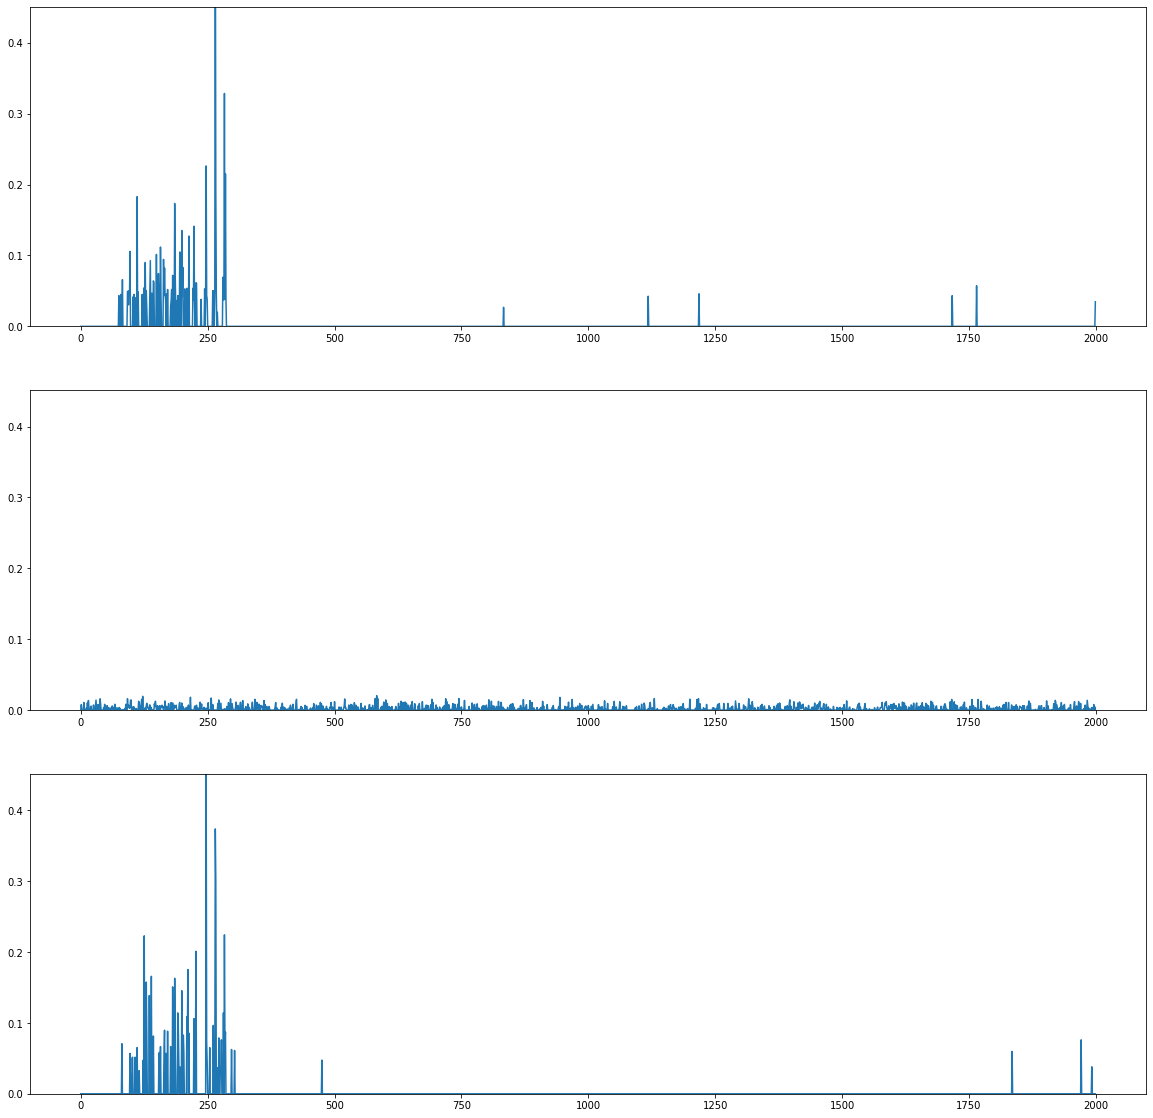

In [32]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(20,20))
i = 0
first = dataset_low[i]
second = prediction[i]
third = dataset_high[i]
top_max = dataset_high[i]

axs[0].plot(range(0, 2000), first)
axs[0].set_ylim(bottom=0, top=np.amax(top_max), auto=True)
print(np.amax(first))

axs[1].plot(range(0, 2000), second)
axs[1].set_ylim(bottom=0, top=np.amax(top_max), auto=True)
print(np.amax(second))

axs[2].plot(range(0, 2000), third)
axs[2].set_ylim(bottom=0, top=np.amax(top_max), auto=True)
print(np.amax(third))

In [27]:
prediction[1]

array([0.        , 0.00776599, 0.        , ..., 0.00462175, 0.        ,
       0.00376347], dtype=float32)